In [1]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#取得資料分為訓練資料跟測試資料

Using TensorFlow backend.


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_test.shape

(10000,)

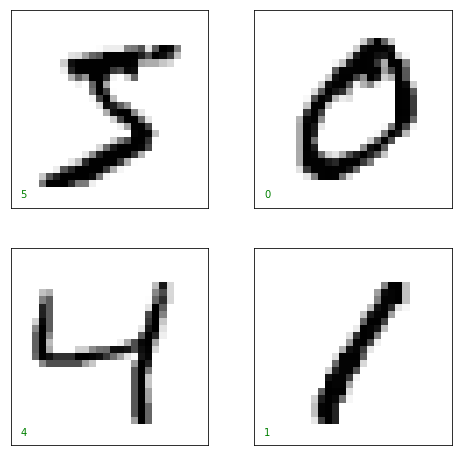

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes=plt.subplots(2,2,figsize=(8,8),subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i],cmap='binary',interpolation='nearest')
    ax.text(0.05,0.05,str(y_train[i]),transform=ax.transAxes, color='green')

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(32, input_dim=784,Activation('relu')))

SyntaxError: positional argument follows keyword argument (<ipython-input-7-580b50918e36>, line 4)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(32, input_dim=784,Activation='relu'))

TypeError: ('Keyword argument not understood:', 'Activation')

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dropout(0.5))
#32 為輸出給下一層
#784為輸入維度，只有第一層需要輸入
#Dropout 為了避免訓練集太過接近測試集，需要丟棄一些資料
#訓練集應該要接近預測集
model.add(Dense(10, activation='softmax'))
#10 為輸出個數數字0~9

In [38]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
x_Train=x_train.reshape(60000,784)
#轉換為跟輸入維度一致784=28*28

In [40]:
from keras import utils as np_utils
y_Train_OneHot=np_utils.to_categorical(y_train)
#將y_train轉變為二維

In [41]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [42]:
y_Train_OneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [43]:
x_Train_normalize=x_Train/255
y_Train_normalize=y_Train_OneHot/255

In [44]:
#model.fit(x_Train, y_Train_OneHot, epochs=10, batch_size=32)
train_history = model.fit(x_Train_normalize, y_Train_normalize, validation_split=0.2, epochs=10, batch_size=32)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 53us/step - loss: 0.0018 - acc: 0.8649 - val_loss: 8.1213e-04 - val_acc: 0.9408
Epoch 2/10
48000/48000 [==============================] - 2s 47us/step - loss: 0.0011 - acc: 0.9180 - val_loss: 6.8072e-04 - val_acc: 0.9518
Epoch 3/10
48000/48000 [==============================] - 2s 46us/step - loss: 9.9275e-04 - acc: 0.9300 - val_loss: 6.1417e-04 - val_acc: 0.9593
Epoch 4/10
48000/48000 [==============================] - 2s 47us/step - loss: 9.1977e-04 - acc: 0.9350 - val_loss: 5.8229e-04 - val_acc: 0.9619
Epoch 5/10
48000/48000 [==============================] - 2s 47us/step - loss: 8.8129e-04 - acc: 0.9405 - val_loss: 5.9200e-04 - val_acc: 0.9630
Epoch 6/10
48000/48000 [==============================] - 2s 48us/step - loss: 8.6454e-04 - acc: 0.9420 - val_loss: 5.5801e-04 - val_acc: 0.9653
Epoch 7/10
48000/48000 [==============================] - 2s 52us/step - loss: 8.2221e-0

In [45]:
x_Test=x_test.reshape(10000,784)
y_Test_OneHot=np_utils.to_categorical(y_test)

In [46]:
score = model.evaluate(x_Test, y_Test_OneHot, batch_size=128)

10000/10000 [==============================] - 0s 7us/step


In [47]:
score

[0.5705641729354859, 0.9643]

In [48]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])   
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(['train','validation'], loc = 'upper left')
    plt.show()

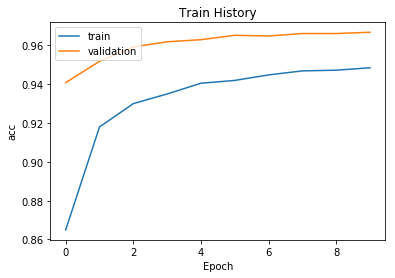

In [49]:
show_train_history(train_history, 'acc', 'val_acc')

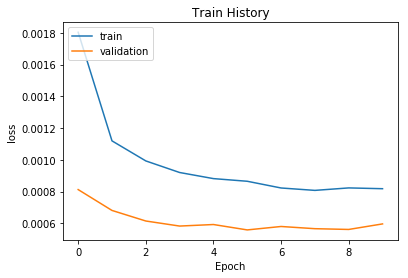

In [50]:
show_train_history(train_history, 'loss', 'val_loss')